# Data anlysis of CalcioTrend
We are going to analyze the data of CalcioTrend

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

In [11]:
        app = pd.read_csv("Assignment_Data/appearances.csv")
        club_games = pd.read_csv("Assignment_Data/club_games.csv")
        clubs = pd.read_csv("Assignment_Data/clubs.csv")
        competitions = pd.read_csv("Assignment_Data/competitions.csv")
        game_events = pd.read_csv("Assignment_Data/game_events.csv")
        game_lineups = pd.read_csv("Assignment_Data/game_lineups.csv")
        games = pd.read_csv("Assignment_Data/games.csv")
        player_valuations = pd.read_csv("Assignment_Data/player_valuations.csv")
        players = pd.read_csv("Assignment_Data/players.csv")

## Data understanding
Let's observe the data to see how they are composed

In [27]:
app.shape #Numero righe/colonne del dataset
app.head() #Primi 5 elementi del dataset
app.columns #Nome delle colonne
app.describe() #Descrizione del dataset

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06
mean,3.014718e+06,1.798913e+05,2.881502e+03,3.638909e+03,1.490230e-01,3.827244e-03,9.635778e-02,7.431050e-02,6.964984e+01
std,5.570794e+05,1.652259e+05,7.113885e+03,9.309395e+03,3.675721e-01,6.174624e-02,3.318755e-01,2.834195e-01,2.976078e+01
min,2.211607e+06,1.000000e+01,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.518634e+06,5.369600e+04,2.890000e+02,3.360000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+01
50%,2.917390e+06,1.271420e+05,8.550000e+02,9.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.450701e+06,2.608060e+05,2.441000e+03,2.687000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,4.227848e+06,1.186012e+06,8.367800e+04,8.367800e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.200000e+02


## Data preparation
Data cleaning

In [103]:
print(app.isna().sum()) #Controlla se ci sono valori nulli
print(club_games.isna().sum())

appearance_id               0
game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64
game_id                      0
club_id                      0
own_goals                    0
own_position             38908
own_manager_name          1484
opponent_id                  0
opponent_goals               0
opponent_position        38908
opponent_manager_name     1484
hosting                      0
is_win                       0
dtype: int64


In [29]:
app.dropna(inplace=True) #Rimuove i valori nulli
club_games.dropna(inplace=True)

In [30]:
print(app.isna().sum()) #Controlla se ci sono valori nulli
print(club_games.isna().sum())

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               0
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64
game_id                  0
club_id                  0
own_goals                0
own_position             0
own_manager_name         0
opponent_id              0
opponent_goals           0
opponent_position        0
opponent_manager_name    0
hosting                  0
is_win                   0
dtype: int64


In [51]:
app.loc[app.duplicated()] #Controlla se ci sono valori duplicati

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played


## Data analysis
We compare the assists made by a player with their goals. We use a sample composed of 20 players.

<Figure size 1000x600 with 0 Axes>

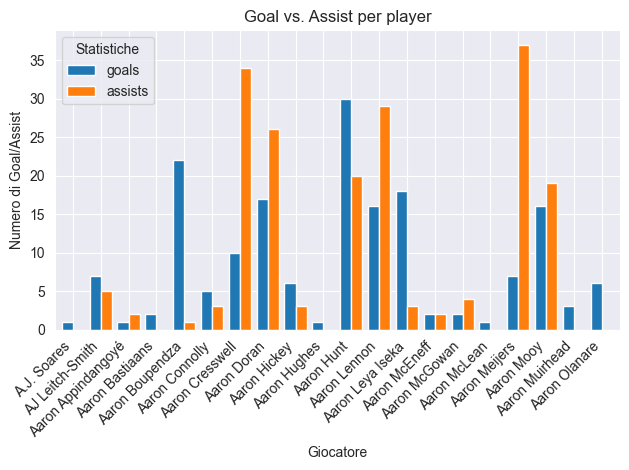

In [31]:
grouped_app = app.groupby('player_name')[['goals', 'assists']].sum()
grouped_app = grouped_app [(grouped_app['goals'] > 0) | (grouped_app['assists'] > 0)]
grouped_app = grouped_app.head(20)

# Grafico a barre (Rappresenta dati disctreti ogni barra rappresenta un giocatore
plt.figure(figsize=(10, 6))
grouped_app.plot(kind='bar', width=0.8)
plt.title('Goal vs. Assist per player')
plt.xlabel('Giocatore')
plt.ylabel('Numero di Goal/Assist')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Statistiche')
plt.tight_layout()
plt.show()

We can observe that there is not a directly proportional relationship between goals and assists for the same player

In this section, we will analyze the number of appearances for each player and visualize the top 20 players with the most appearances.

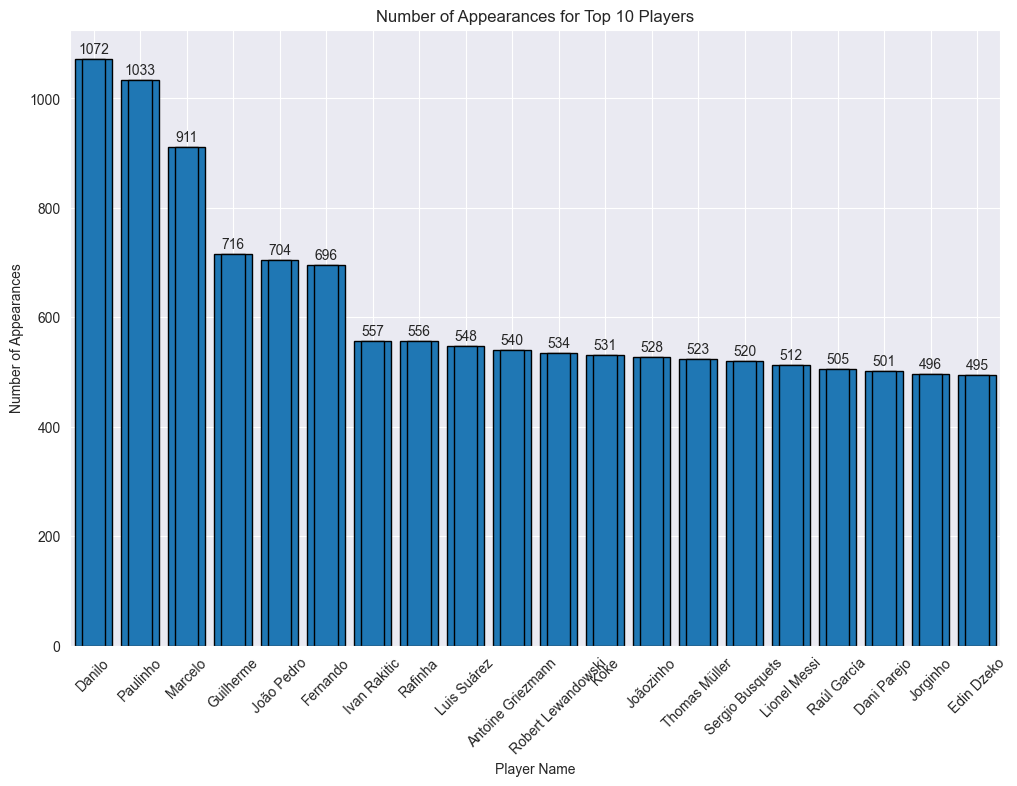

In [7]:
# Calcola il numero di apparizioni per giocatore
merged_data = app.merge(players, on='player_id')
appearances_per_player = merged_data.groupby('name')['appearance_id'].count()

# Ordina i giocatori per numero di apparizioni in ordine decrescente
top_players = appearances_per_player.sort_values(ascending=False)

# Seleziona i primi 10 giocatori
top_20_players = top_players.head(20)

# Crea un grafico a barre utilizzando i valori delle apparizioni e i nomi dei giocatori
plt.figure(figsize=(12, 8))
bars = plt.bar(top_20_players.index, top_20_players.values, edgecolor='black')
top_20_players.plot(kind='bar', edgecolor='black')
plt.xlabel('Player Name')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances for Top 10 Players')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.show()

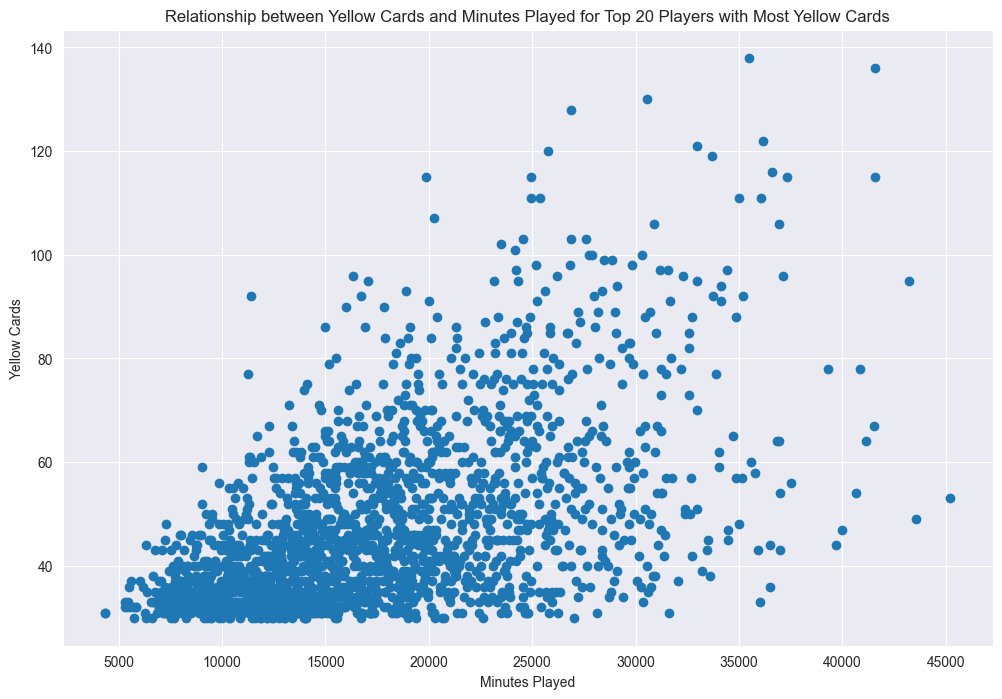

In [17]:

# Calcola il numero totale di cartellini gialli per ciascun giocatore
yellow_cards_per_player = app.groupby('player_id')['yellow_cards'].sum()

# Seleziona i primi 20 giocatori con il maggior numero di cartellini gialli
top_20_yellow_cards = yellow_cards_per_player.sort_values(ascending=False).head(2000)

# Calcola il numero totale di minuti giocati per ciascun giocatore
minutes_played_per_player = app.groupby('player_id')['minutes_played'].sum()

# Seleziona i dati dei minuti giocati per i primi 20 giocatori con più cartellini gialli
top_20_minutes_played = minutes_played_per_player[top_20_yellow_cards.index]

# Crea uno scatter plot per visualizzare la relazione tra cartellini gialli e minuti giocati
plt.figure(figsize=(12, 8))
plt.scatter(top_20_minutes_played, top_20_yellow_cards)
plt.xlabel('Minutes Played')
plt.ylabel('Yellow Cards')
plt.title('Relationship between Yellow Cards and Minutes Played for Top 20 Players with Most Yellow Cards')

# Aggiungi i nomi dei giocatori vicino ai punti nello scatter plot
#for i, player_id in enumerate(top_20_yellow_cards.index):
 #   player_name = app[app['player_id'] == player_id]['player_name'].iloc[0]
  #  plt.annotate(player_name, (top_20_minutes_played.iloc[i], top_20_yellow_cards.iloc[i]), fontsize=9, ha='center')

plt.show()


In this graphics we can see that there is no direct relationship between the number of yellow cards and the minutes played by the players.

### Top scorers Analysis

In [109]:
goals_events =game_events[game_events['type'] == 'Goals']
players_goals = goals_events.groupby('player_id').size().reset_index(name='total_goals')
top_scorers = players_goals.merge(players, on='player_id')
top_scorers = top_scorers.sort_values(by='total_goals', ascending=False).head(10)

top_scorers.head(10)

,player_id,total_goals,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
2229,38253,449,Robert,Lewandowski,Robert Lewandowski,2023,131,robert-lewandowski,Poland,Warszawa,...,right,185.0,30000000.0,90000000.0,2026-06-30 00:00:00,Gol International,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/robert-lewando...,ES1,FC Barcelona
1583,28003,443,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,...,left,170.0,35000000.0,180000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lionel-messi/p...,FR1,Paris Saint-Germain
502,8198,433,NaN,Cristiano Ronaldo,Cristiano Ronaldo,2022,985,cristiano-ronaldo,Portugal,Funchal,...,right,187.0,15000000.0,120000000.0,2025-06-30 00:00:00,Gestifute,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/cristiano-rona...,GB1,Manchester United
6547,132098,294,Harry,Kane,Harry Kane,2023,27,harry-kane,England,London,...,right,188.0,90000000.0,150000000.0,2027-06-30 00:00:00,CK66,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/harry-kane/pro...,L1,Bayern Munich
2595,44352,283,Luis,Suárez,Luis Suárez,2021,13,luis-suarez,Uruguay,Salto,...,right,182.0,4000000.0,90000000.0,2024-12-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/luis-suarez/pr...,ES1,Atlético de Madrid
1071,18922,279,Karim,Benzema,Karim Benzema,2022,418,karim-benzema,France,Lyon,...,right,185.0,25000000.0,60000000.0,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/karim-benzema/...,ES1,Real Madrid
3613,58864,274,Pierre-Emerick,Aubameyang,Pierre-Emerick Aubameyang,2023,244,pierre-emerick-aubameyang,France,Laval,...,right,187.0,4000000.0,75000000.0,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/pierre-emerick...,FR1,Olympique Marseille
6957,148455,251,NaN,Mohamed Salah,Mohamed Salah,2023,31,mohamed-salah,Egypt,"Nagrig, Basyoun",...,left,175.0,65000000.0,150000000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mohamed-salah/...,GB1,Liverpool FC
5659,105521,249,Ciro,Immobile,Ciro Immobile,2023,398,ciro-immobile,Italy,Torre Annunziata,...,right,185.0,15000000.0,50000000.0,2026-06-30 00:00:00,Gea World,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ciro-immobile/...,IT1,SS Lazio
5369,96341,247,Romelu,Lukaku,Romelu Lukaku,2023,12,romelu-lukaku,Belgium,Antwerpen,...,left,191.0,40000000.0,100000000.0,2024-06-30 00:00:00,TEAM LUKAKU,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/romelu-lukaku/...,IT1,AS Roma


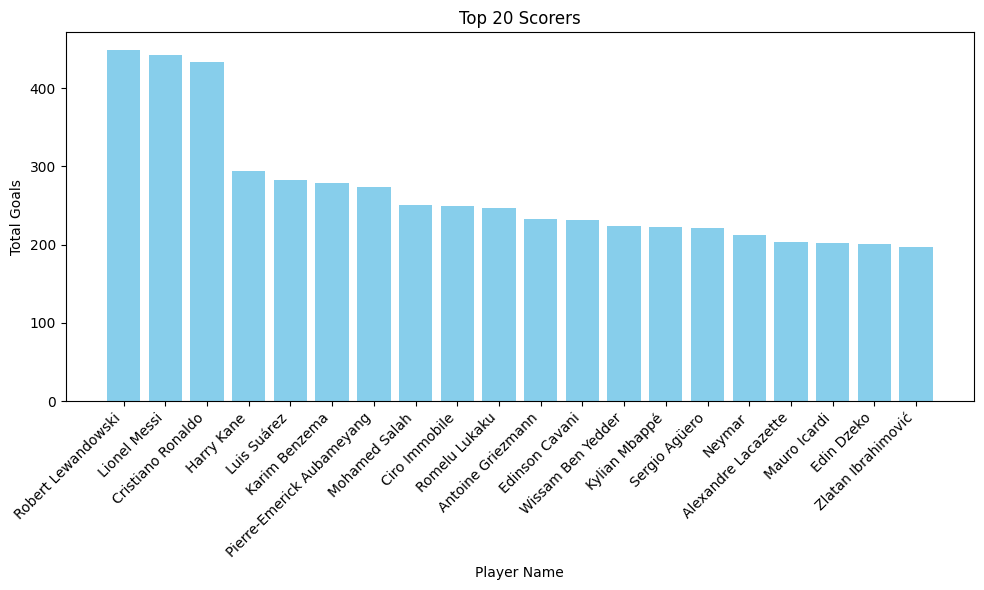

In [7]:
#filter to get only the goals events
goals_events =game_events[game_events['type'] == 'Goals']
#group by player_id and count the number of goals
players_goals = goals_events.groupby('player_id').size().reset_index(name='total_goals')
top_scorers = players_goals.merge(players, on='player_id')
top_scorers = top_scorers.sort_values(by='total_goals', ascending=False).head(20)

#bar chart 
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['name'], top_scorers['total_goals'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Total Goals')
plt.title('Top 20 Scorers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Competitions Analysis

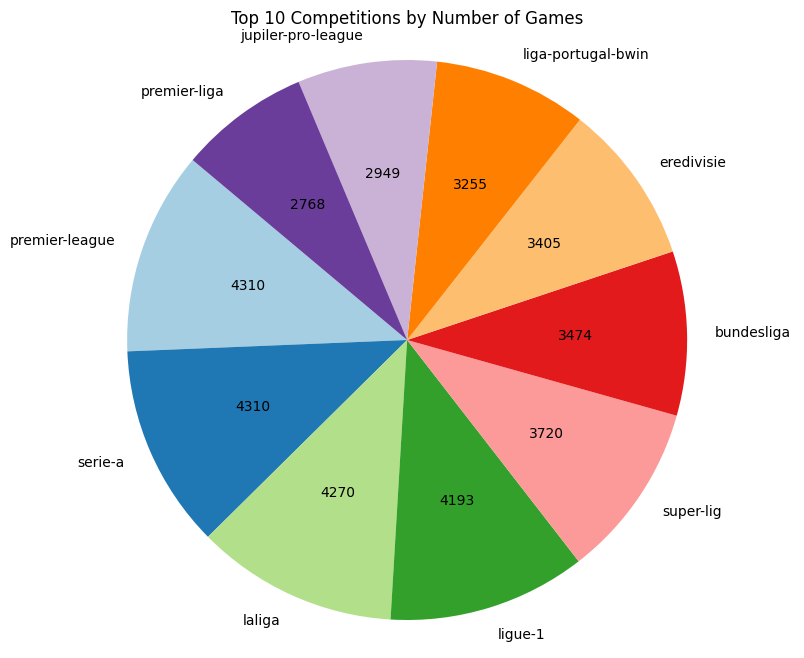

In [8]:
competitions_games = games.groupby('competition_id').size().reset_index(name='total_games')
competition_performance = competitions_games.merge(competitions, on='competition_id')
# Sort competitions by the number of games
top_competitions = competition_performance.sort_values(by='total_games', ascending=False).head(10)
def all_games(val): a = np.round(val/100.*top_competitions['total_games'].sum(), 0); return int(a)

#pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_competitions['total_games'], labels=top_competitions['name'], autopct=all_games, startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Competitions by Number of Games')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Club performance Analysis

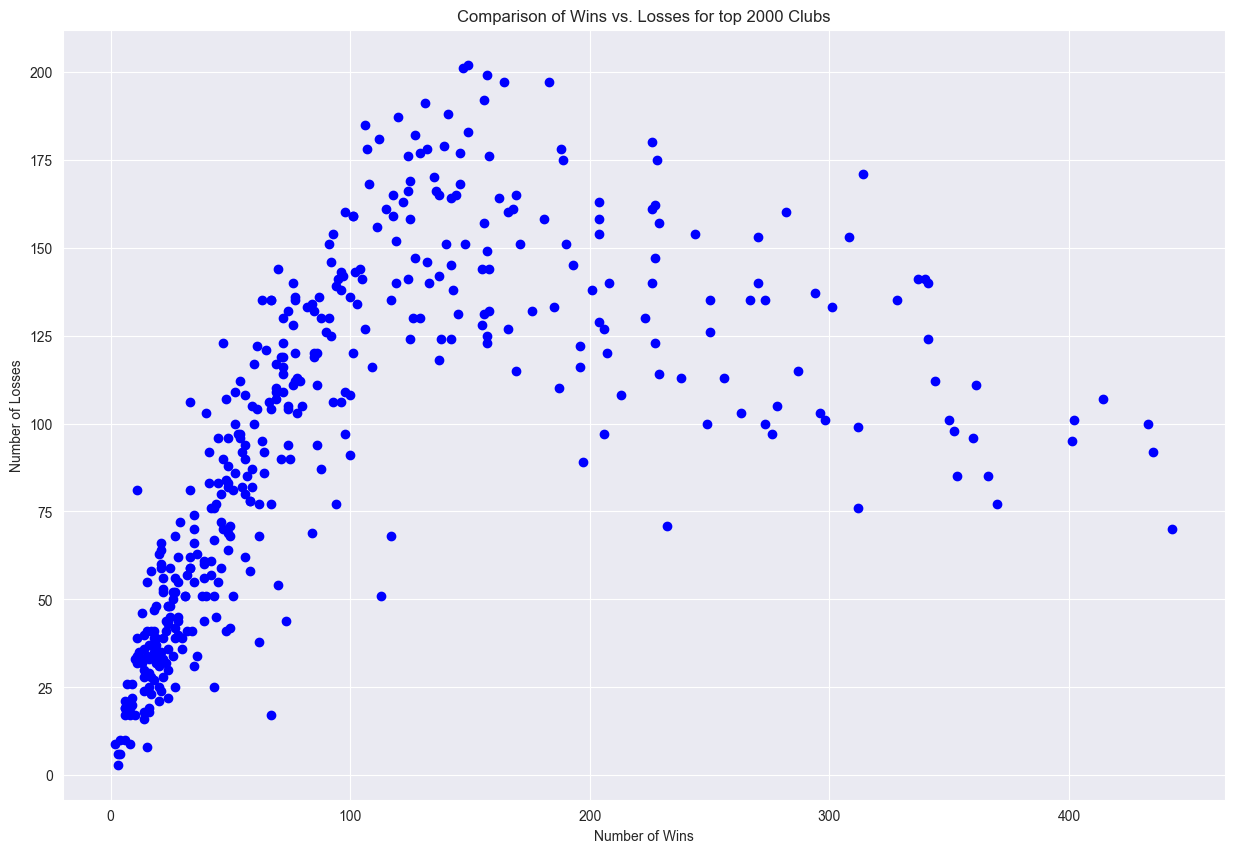

In [9]:


# Calcola le vittorie in casa, le vittorie in trasferta e le sconfitte
games['home_win'] = games['home_club_goals'] > games['away_club_goals']
games['away_win'] = games['home_club_goals'] < games['away_club_goals']

# Aggregazione delle performance dei club in casa
home_performance = games.groupby('home_club_id').agg(
    total_games=('game_id', 'count'),
    wins=('home_win', 'sum'),
    losses=('away_win', 'sum')
).reset_index()

# Aggregazione delle performance dei club in trasferta
away_performance = games.groupby('away_club_id').agg(
    total_games=('game_id', 'count'),
    wins=('away_win', 'sum'),
    losses=('home_win', 'sum')
).reset_index()

# Rinomina delle colonne per uniformità
home_performance.rename(columns={'home_club_id': 'club_id'}, inplace=True)
away_performance.rename(columns={'away_club_id': 'club_id'}, inplace=True)

# Combina le performance in casa e in trasferta
club_performance = pd.concat([home_performance, away_performance])
club_performance = club_performance.groupby('club_id').sum().reset_index()

# Unione con il dataset dei club
club_performance = club_performance.merge(clubs, on='club_id')

# Selezione dei primi 2000 club per numero di vittorie
top_clubs = club_performance.sort_values(by='wins', ascending=False).head(2000)

# Creazione dello scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(top_clubs['wins'], top_clubs['losses'], c='blue', label='Losses')
#for i, club in top_clubs.iterrows():
 #   plt.text(club['wins'], club['losses'], club['name'], fontsize=9, ha='center', va='bottom', color='black', rotation=0)
plt.xlabel('Number of Wins')
plt.ylabel('Number of Losses')
plt.title('Comparison of Wins vs. Losses for top 2000 Clubs')
plt.show()


the graph shows that the concentration of teams is in the lower left part of the graph this shows the limited number of wins compared to losses. Consequently, teams with a high number of wins compared to losses should be in the bottom right of the graph, but in that part we find a small number of teams.

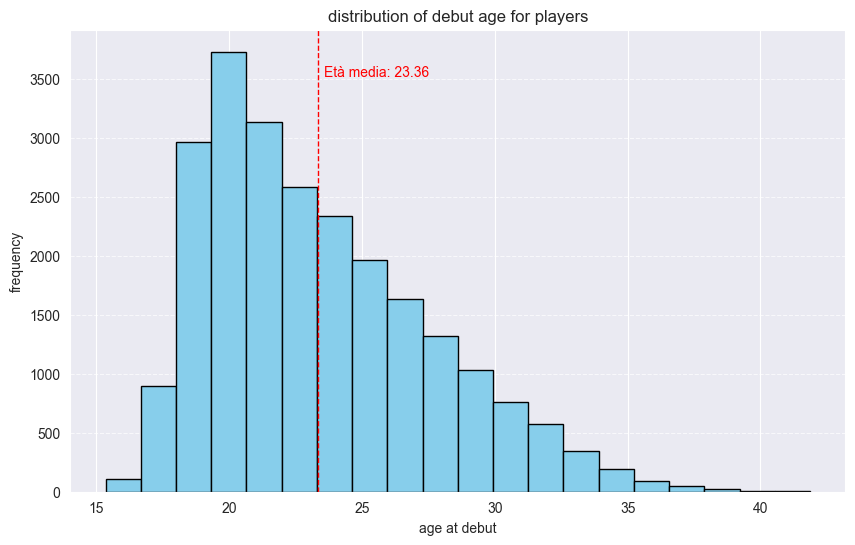

In [8]:
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
app['date'] = pd.to_datetime(app['date'])

first_appearances = app.groupby('player_id')['date'].min().reset_index()
first_appearances.rename(columns={'date': 'debut_date'}, inplace=True)

player_debut = first_appearances.merge(players[['player_id', 'date_of_birth']], on='player_id')

player_debut['debut_age'] = (player_debut['debut_date'] - player_debut['date_of_birth']).dt.days / 365.25

average_debut_age = player_debut['debut_age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(player_debut['debut_age'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_debut_age, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('age at debut')
plt.ylabel('frequency')
plt.title('distribution of debut age for players')
plt.text(average_debut_age + 0.2, plt.ylim()[1] * 0.9, f'Età media: {average_debut_age:.2f}', color='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


With this histogram we can see the distribution of the age at which the players made their debut. The average age at debut is 23.36 years.

In [6]:

# Filtrare i primi 1000 giocatori con valore di mercato più alto
top_players = players.nlargest(100, 'market_value_in_eur')

# Mappatura dei paesi
country_mapping = {
    "England": "United Kingdom",
    "Scotland": "United Kingdom",
    "Wales": "United Kingdom",
    "Northern Ireland": "United Kingdom"
}

# Applicare la mappatura dei paesi di nascita
top_players['country_of_birth'] = top_players['country_of_birth'].replace(country_mapping)

# Inizializzare il geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Aggiungere colonne per latitudine e longitudine
top_players['latitude'] = None
top_players['longitude'] = None

# Geocodificare le città di nascita per i primi 1000 giocatori con gestione degli errori
for index, row in top_players.iterrows():
    location_query = f"{row['city_of_birth']}, {row['country_of_birth']}"
    location = geolocator.geocode(location_query)
    if location:
        top_players.at[index, 'latitude'] = location.latitude
        top_players.at[index, 'longitude'] = location.longitude

# Rimuovere i giocatori senza coordinate valide
top_players = top_players.dropna(subset=['latitude', 'longitude'])

# Creare una mappa con Folium
m = folium.Map(location=[0, 0], zoom_start=2)

# Aggiungere marcatori per i giocatori con valore di mercato più alto
for idx, player in top_players.iterrows():
    folium.Marker(
        location=[player['latitude'], player['longitude']],
        popup=f"{player['first_name']} {player['last_name']} ({player['market_value_in_eur']} EUR)"
    ).add_to(m)

# Mostrare la mappa
m


It can be seen from the graph that players with higher market values are concentrated in central Europe and South America

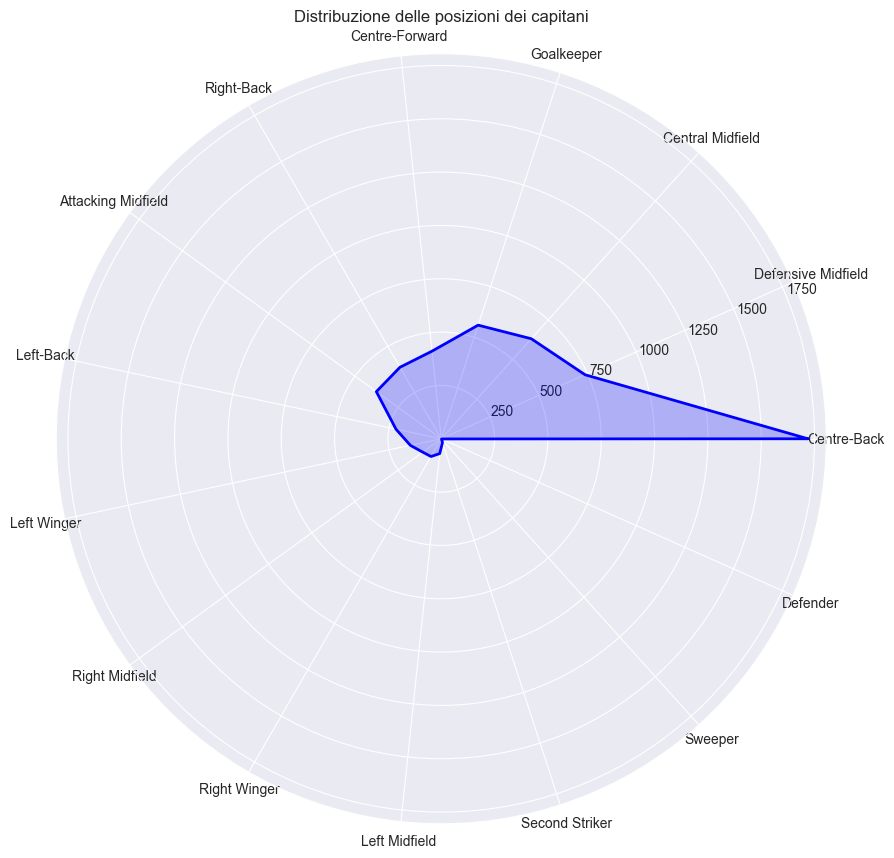

In [12]:


# Filtrare i capitani
captains = game_lineups[game_lineups['team_captain'] == True]

# Contare le posizioni dei capitani
captain_positions = captains['position'].value_counts()

# Preparare i dati per il grafico radar
labels = captain_positions.index
stats = captain_positions.values

# Numero di variabili
num_vars = len(labels)

# Calcolare gli angoli di ogni asse nel grafico radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Aggiungere il primo valore alla fine per chiudere il cerchio
stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]

# Creare il grafico radar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='blue', alpha=0.25)
ax.plot(angles, stats, color='blue', linewidth=2)

# Aggiungere le etichette degli assi
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Impostare il titolo
plt.title('Distribuzione delle posizioni dei capitani')

# Mostrare il grafico
plt.show()


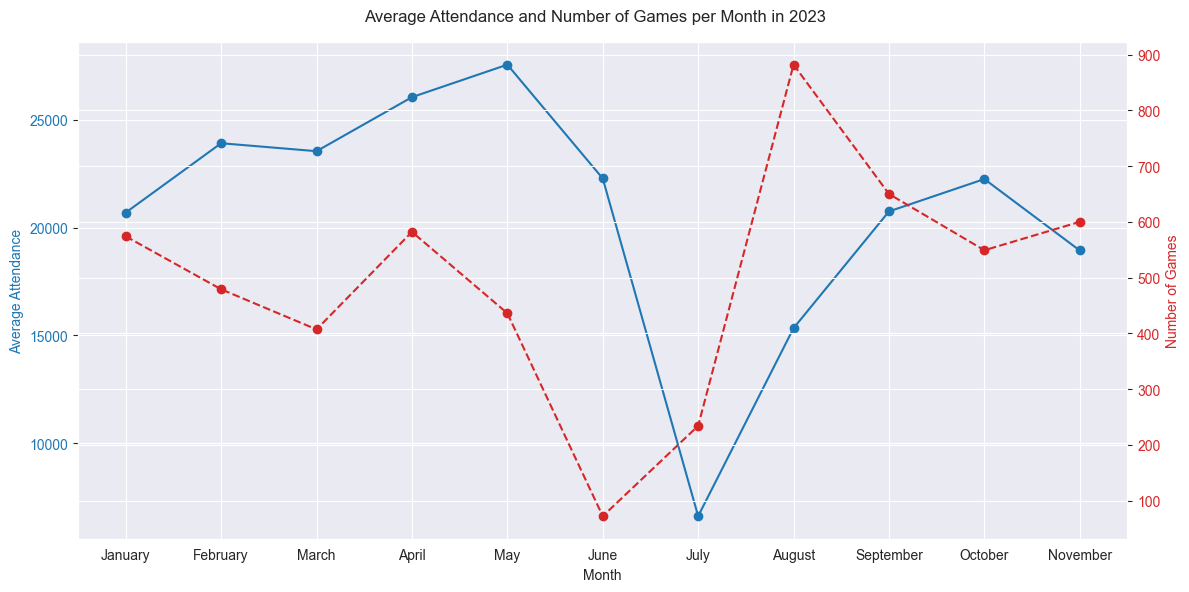

In [15]:
# Convertire la colonna 'date' in formato datetime
games['date'] = pd.to_datetime(games['date'])

# Filtrare le partite da gennaio 2023 a dicembre 2023
games_2023 = games[(games['date'] >= '2023-01-01') & (games['date'] <= '2023-12-31')].copy()

# Estrarre il mese dalla colonna 'date' e creare una nuova colonna 'month'
games_2023['month'] = games_2023['date'].dt.month

# Mappare i numeri dei mesi ai nomi dei mesi
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
games_2023['month_name'] = games_2023['month'].map(month_names)

# Calcolare la media degli spettatori per ogni mese
monthly_attendance = games_2023.groupby('month_name')['attendance'].mean().reindex(month_names.values())

# Calcolare il numero di partite per ogni mese
monthly_games_count = games_2023['month_name'].value_counts().reindex(month_names.values())

# Creare il grafico a linee
fig, ax1 = plt.subplots(figsize=(12, 6))

# Prima linea (media degli spettatori)
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Attendance', color=color)
ax1.plot(monthly_attendance.index, monthly_attendance.values, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Seconda linea (numero di partite)
ax2 = ax1.twinx()  # Inizializzare un secondo asse y che condivide lo stesso asse x
color = 'tab:red'
ax2.set_ylabel('Number of Games', color=color)
ax2.plot(monthly_games_count.index, monthly_games_count.values, marker='o', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Impostare il titolo
fig.suptitle('Average Attendance and Number of Games per Month in 2023')

# Mostrare il grafico
fig.tight_layout()  # Per adattare bene i layout
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


From the graph we can see how the season affects the 'following' of the matches, in fact we can see that although there were many matches in August, the following was less. Whereas we can see that in January and September the number of matches and the following are proportionate.